In [1]:
import pandas as pd

In [2]:
ch = pd.read_csv(r"F:\carreer\Churn.csv")
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
ch.shape # to get idea of the record and column in dataset

(7043, 21)

In [4]:
ch.head() # just looking into the data to get about the x factor

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
ch.isnull().sum() # to check nulls

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
ch.isnull().sum() [ch.isnull().sum() >0] # 

Series([], dtype: int64)

In [7]:
ch.select_dtypes(include = 'object').columns # to know how many object column is present

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [8]:
len(ch.select_dtypes(include = 'object').columns)

18

In [9]:
ch.select_dtypes(exclude = 'object').columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [10]:
ch.TotalCharges.value_counts()

           11
20.2       11
19.75       9
20.05       8
19.9        8
19.65       8
45.3        7
19.55       7
20.15       6
20.25       6
19.45       6
20.3        5
20.45       5
19.85       4
69.9        4
20.4        4
70.6        4
19.2        4
69.65       4
44          4
44.4        4
20.5        4
49.9        4
74.7        4
19.3        4
19.95       4
19.5        4
75.3        4
50.15       4
20.35       4
69.6        4
19.4        4
69.95       4
19.25       3
70.45       3
1284.2      3
69.25       3
74.3        3
20.9        3
220.45      3
20.55       3
69.1        3
20.1        3
305.55      3
50.6        3
74.6        3
20          3
45.85       3
44.75       3
70.15       3
75.35       3
19.1        3
74.9        3
86.05       3
79.55       3
74.35       3
35.9        3
24.4        3
45.7        3
2317.1      3
383.65      3
50.75       3
25.25       3
55.7        3
45.1        3
84.5        3
85          3
50.45       3
80.55       3
70.3        3
24.8        3
470.2 

In [11]:
ch = ch.drop(["customerID"], axis=1) # we don't need the column

# Non-Numeric to Numeric

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
ch.gender.replace({'Male':1, "Female":0}, inplace=True)
ch.Partner.replace({'Yes':1, "No":0}, inplace=True)
ch.Dependents.replace({'Yes':1, "No":0}, inplace=True)
ch.PhoneService.replace({'Yes':1, "No":0}, inplace=True)
ch.MultipleLines.replace({'Yes':1, "No":0,'No phone service':2}, inplace=True)
ch.InternetService.replace({'DSL':1, "No":0, 'Fiber optic' : 2}, inplace=True)
ch.OnlineSecurity.replace({'Yes':1, "No":0,'No internet service':2}, inplace=True)
ch.OnlineBackup.replace({'Yes':1, "No":0,'No internet service':2}, inplace=True)
ch.DeviceProtection.replace({'Yes':1, "No":0,'No internet service':2}, inplace=True)
ch.TechSupport.replace({'Yes':1, "No":0,'No internet service':2}, inplace=True)
ch.StreamingTV.replace({'Yes':1, "No":0,'No internet service':2}, inplace=True)
ch.StreamingMovies.replace({'Yes':1, "No":0,'No internet service':2}, inplace=True)
ch.Contract.replace({'One year':1, "Month-to-month":0,'Two year':2}, inplace=True)
ch.PaperlessBilling.replace({'Yes':1, "No":0}, inplace=True)
ch.PaymentMethod.replace({'Bank transfer (automatic)':1, "Credit card (automatic)":0,'Mailed check':2,'Electronic check':3}, inplace=True)
ch.Churn.replace({'Yes':1, "No":0}, inplace=True)
ch.TotalCharges = le.fit_transform(ch.TotalCharges)

In [15]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [16]:
len(ch.select_dtypes(include = 'object').columns)

0

# Sampling

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_ch , test_ch = train_test_split(ch,test_size = .2)

In [19]:
train_ch_x = train_ch.iloc[: , 0:-1]
train_ch_y = train_ch.iloc[: , -1]

In [20]:
test_ch_x = test_ch.iloc[: , 0:-1]
test_ch_y = test_ch.iloc[: , -1]

In [21]:
print(train_ch_x.shape)
print(train_ch_y.shape)
print("-------")
print(test_ch_x.shape)
print(test_ch_y.shape)

(5634, 19)
(5634,)
-------
(1409, 19)
(1409,)


# Building the Model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_ch = LogisticRegression()

In [24]:
log_ch.fit(train_ch_x , train_ch_y); # model has been build

C:\Users\Shyam Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
pred = log_ch.predict(test_ch_x)

In [26]:
len(pred) # record in test data

1409

In [28]:
pd.crosstab(test_ch_y , pred) 

col_0,0,1
Churn,,
0,907,142
1,167,193


# Confution Matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
tab_ch = confusion_matrix(test_ch_y , pred)
tab_ch # from top it is predicted

array([[907, 142],
       [167, 193]], dtype=int64)

In [31]:
tab_ch = confusion_matrix( pred , test_ch_y )
tab_ch # predicted from left to right

array([[907, 167],
       [142, 193]], dtype=int64)

# Accuracy

In [32]:
from sklearn.metrics import accuracy_score # for accuracy 

In [33]:
accuracy_score(test_ch_y , pred)

0.7806955287437899

# Precision

In [34]:
from sklearn.metrics import precision_score # for precision

In [35]:
precision_score(test_ch_y , pred)

0.5761194029850746

# Recall

In [36]:
from sklearn.metrics import recall_score # to find recall

In [37]:
recall_score(test_ch_y , pred)

0.5361111111111111

# F1

In [38]:
from sklearn.metrics import f1_score

In [39]:
f1_score(test_ch_y , pred)

0.5553956834532374

# ROC curve

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [41]:
pred = log_ch.predict(test_ch_x) #pred

In [43]:
pred_prob = log_ch.predict_proba(test_ch_x) # proba mean to predict probsblity

In [44]:
pred_prob

array([[0.62458092, 0.37541908],
       [0.98431814, 0.01568186],
       [0.99138929, 0.00861071],
       ...,
       [0.94433273, 0.05566727],
       [0.98502705, 0.01497295],
       [0.97696689, 0.02303311]])

In [46]:
roc_auc_score(test_ch_y , pred) # this is the area under the curve

0.7003720474526003

In [47]:
# ROC CURVE
fpr , tpr , thres = roc_curve(test_ch_y , pred_prob[: , 1])  # this will return 3 things fpr tpr thres

# Plotting the curve

In [48]:
import matplotlib.pyplot as plt

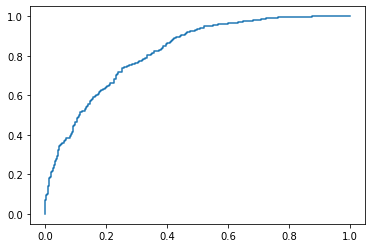

In [49]:
plt.plot(fpr , tpr) # graph of curve

Text(0.5, 0.5, 'Auroc is 0.7003720474526003 ')

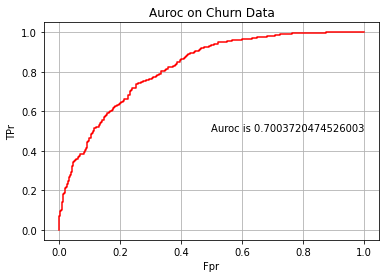

In [50]:
# not looking lets represent it
plt.plot(fpr , tpr , color = 'r')
plt.xlabel("Fpr") # show on x axis
plt.ylabel("TPr") # show on y axis
plt.title("Auroc on Churn Data") # to add title
plt.grid() # to show grid
plt.text(x = .5 , y = .5 , s="Auroc is 0.7003720474526003 ") # to plot text

In [ ]:
# just to practice took the dataset